In [1]:
import pandas as pd
import numpy as np

print("Preprocessing and cleaning data...\n")
##Read excel spread sheet of data
data = pd.read_excel('cleaned_data.xls', header=0)

##Declare the column names
data.columns = ['date', 's_and_p_comp', 'dividend', 'earnings',
                'CPI', 'fraction_date', 'long_interest_rate', 'real_price',
                'real_dividend', 'real_total_return_price','real_earnings',
                'real_scaled_earnings', 'CAPE', 'TR_CAPE', 'excess_CAPE', 'montly_bond_return',
                'real_bond_return','10_year_stock_return', '10_year_bond_return',
                '10_year_excess_return']

##Replaces all 'NA' rows with NAN type
data = data.replace('NA',np.NaN)

data.head()

##Drop "10 year" columns so there are no rows with missing data after 2011
print("Dropping unfinished columns...")    
data = data.drop(['10_year_stock_return'],axis=1)
data = data.drop(['10_year_bond_return'],axis=1)
data = data.drop(['10_year_excess_return'],axis=1)

##Drop rows with missing data
print("Dropping unfinished rows...")
print('\n\nNumber of rows in original data = %d' % (data.shape[0]))
data = data.dropna()
print('Number of rows after discarding missing values = %d\n' % (data.shape[0]))

#Number
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d\n' % (data.shape[1]))

##Check to make sure there are no missing values in each column
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

print("\n\nPreprocessing done.")

Preprocessing and cleaning data...

Dropping unfinished columns...
Dropping unfinished rows...


Number of rows in original data = 1809
Number of rows after discarding missing values = 1686

Number of instances = 1686
Number of attributes = 17

Number of missing values:
	date: 0
	s_and_p_comp: 0
	dividend: 0
	earnings: 0
	CPI: 0
	fraction_date: 0
	long_interest_rate: 0
	real_price: 0
	real_dividend: 0
	real_total_return_price: 0
	real_earnings: 0
	real_scaled_earnings: 0
	CAPE: 0
	TR_CAPE: 0
	excess_CAPE: 0
	montly_bond_return: 0
	real_bond_return: 0


Preprocessing done.


## Outliers

<AxesSubplot:>

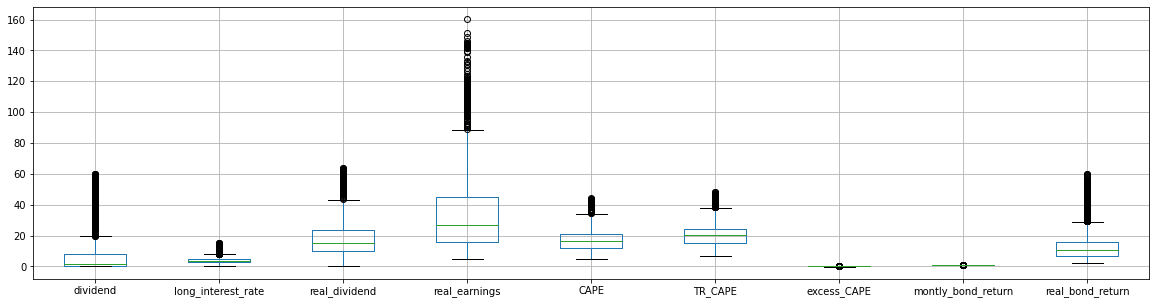

In [5]:
%matplotlib inline

data_bp = data
## Transform Bare Nuclei into numbers before showing the boxplot

data_bp = data_bp.drop(['real_total_return_price'], axis=1)
data_bp = data_bp.drop(['real_scaled_earnings'], axis=1)
data_bp = data_bp.drop(['s_and_p_comp'], axis=1)
data_bp = data_bp.drop(['real_price'], axis=1)
data_bp = data_bp.drop(['date'], axis=1)
data_bp = data_bp.drop(['fraction_date'], axis=1)
data_bp = data_bp.drop(['CPI'], axis=1)
data_bp = data_bp.drop(['earnings'], axis=1)

for row in data_bp.columns:
    data_bp[row] = pd.to_numeric(data_bp[row])
        
data_bp.boxplot(figsize=(20,5))

## Aggregation

Text(0.5, 1.0, 'Daily Precipitation (variance = 459332.9033)')

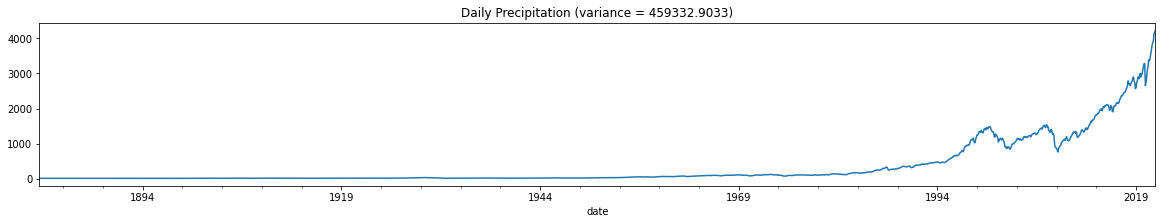

In [9]:
daily = data
daily.index = pd.to_datetime(daily['date'])

daily = daily['s_and_p_comp']
ax = daily.plot(kind='line',figsize=(20,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

Text(0.5, 1.0, 'Annual Precipitation (variance = 61954581.4169)')

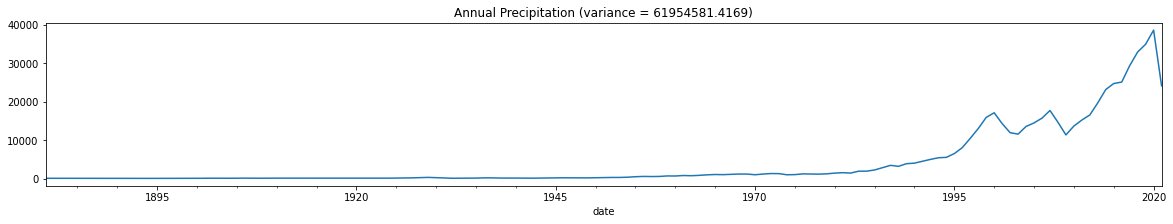

In [10]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
annual = monthly.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(20,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

## Sampling
For our data set, random sampling does not make sense since we are looking at fincial change over *time*. Instead, our sample is a random 10 conescutive rows of data.

In [32]:
import random
randomIndex = random.randint(0,data.shape[0])
sample = data[randomIndex:randomIndex+10]
sample

,date,s_and_p_comp,dividend,earnings,CPI,fraction_date,long_interest_rate,real_price,real_dividend,real_total_return_price,real_earnings,real_scaled_earnings,CAPE,TR_CAPE,excess_CAPE,montly_bond_return,real_bond_return
831,1940-04,12.27,0.636667,1.00667,14.0,1940.291667,2.145000,240.126748,12.459721,9132.658201,19.700766,749.272456,16.370989,20.710720,0.020405,1.003723,15.802420
832,1940-05,10.58,0.643333,1.02333,14.0,1940.375000,2.123333,207.053056,12.590176,7914.680967,20.026806,765.532181,14.138748,17.861798,0.030845,1.003707,15.861260
833,1940-06,9.67,0.650000,1.04000,14.1,1940.458333,2.101667,187.901988,12.630434,7222.857765,20.208694,776.812004,12.843766,16.212648,0.039474,1.003691,15.807156
834,1940-07,9.99,0.656667,1.05333,14.0,1940.541667,2.080000,195.506619,12.851126,7556.341863,20.613913,796.728886,13.369885,16.862230,0.037105,1.003675,15.978831
835,1940-08,10.20,0.663333,1.06667,14.0,1940.625000,2.058333,199.616368,12.981581,7756.995453,20.874980,811.191602,13.649399,17.199450,0.036384,1.003659,16.037559
836,1940-09,10.63,0.670000,1.08000,14.0,1940.708333,2.036667,208.031568,13.112056,8126.466724,21.135851,825.642903,14.214843,17.894527,0.033092,1.003643,16.096245
837,1940-10,10.73,0.670000,1.07000,14.0,1940.791667,2.015000,209.988591,13.112056,8245.598840,20.940148,822.254498,14.328290,18.021167,0.033346,1.003627,16.154889
838,1940-11,10.98,0.670000,1.06000,14.0,1940.875000,1.993333,214.881149,13.112056,8480.620180,20.744446,818.711966,14.636689,18.393381,0.032690,1.003611,16.213487
839,1940-12,10.53,0.670000,1.05000,14.1,1940.958333,1.971667,204.613023,13.019062,8118.190683,20.403008,809.506193,13.908426,17.470115,0.039005,1.003595,16.156634
840,1941-01,10.55,0.673333,1.05333,14.1,1941.041667,1.950000,205.001652,13.083827,8176.869152,20.467715,816.392567,13.904158,17.459724,0.040478,0.997804,16.214721


## Discretization

176.016970    1
472.314409    1
255.796448    1
291.653184    1
187.683402    1
             ..
417.304375    1
100.930594    1
661.092917    1
266.608518    1
206.061135    1
Name: real_price, Length: 1668, dtype: int64

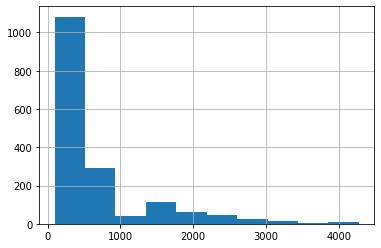

In [36]:
data['real_price'].hist(bins=10)
data['real_price'].value_counts(sort=False)

In [37]:
bins = pd.cut(data['real_price'],4)
bins.value_counts(sort=False)

(91.918, 1140.614]      1389
(1140.614, 2185.133]     197
(2185.133, 3229.652]      83
(3229.652, 4274.171]      17
Name: real_price, dtype: int64

In [38]:
bins = pd.qcut(data['real_price'],4)
bins.value_counts(sort=False)

(96.095, 198.301]      422
(198.301, 310.217]     421
(310.217, 737.047]     421
(737.047, 4274.171]    422
Name: real_price, dtype: int64